In [29]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

#### Let's load the Nashville zipcode data and look at the first few rows
- geopandas reads files with the `read_file()` method
- The zipcode data was downloaded from https://data.nashville.gov/General-Government/Zip-Codes/u7r5-bpku


In [30]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [31]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

#### Now let's look at the difference between calling the first geometry variable.....


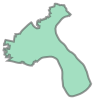

In [32]:
zipcodes.loc[0, 'geometry']

#### ...and printing it


In [33]:
print(zipcodes.loc[0, 'geometry'])

MULTIPOLYGON (((-86.68724897141 36.318212121092, -86.687216475338 36.318210560887, -86.687181702435 36.318208780693, -86.687146962761 36.318206917893, -86.687112187256 36.318205000347, -86.687077445444 36.318202972151, -86.687042702928 36.318200862685, -86.687034690751 36.318200362824, -86.687007959928 36.318198697129, -86.68697325063 36.318196422067, -86.686938539918 36.318194065167, -86.686903827781 36.318191625285, -86.68686914958 36.318189102792, -86.686834437433 36.318186498074, -86.6867997571 36.318183810757, -86.686765111412 36.318181040826, -86.686730430357 36.318178188106, -86.686695782299 36.318175225883, -86.68666116771 36.318172208522, -86.686626552408 36.318169108746, -86.686591935688 36.318165926561, -86.686557318725 36.318162634491, -86.686522735235 36.318159287854, -86.686488151499 36.318155830759, -86.686453600524 36.318152318529, -86.68641904813 36.31814872389, -86.68638449549 36.318145018792, -86.686349976324 36.318141259129, -86.68631549015 36.318137389391, -86.6862

#### Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() function


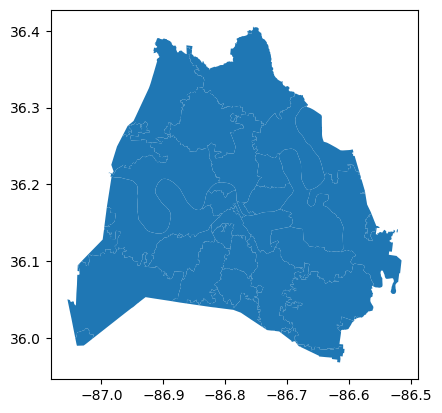

In [34]:
zipcodes.plot();

#### Add information and styling 
- set the `column =` to a column in the GeoDataFrame to color by
- change the [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) 
- pass in keywords to tweak the legend created by [`matplotib`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)


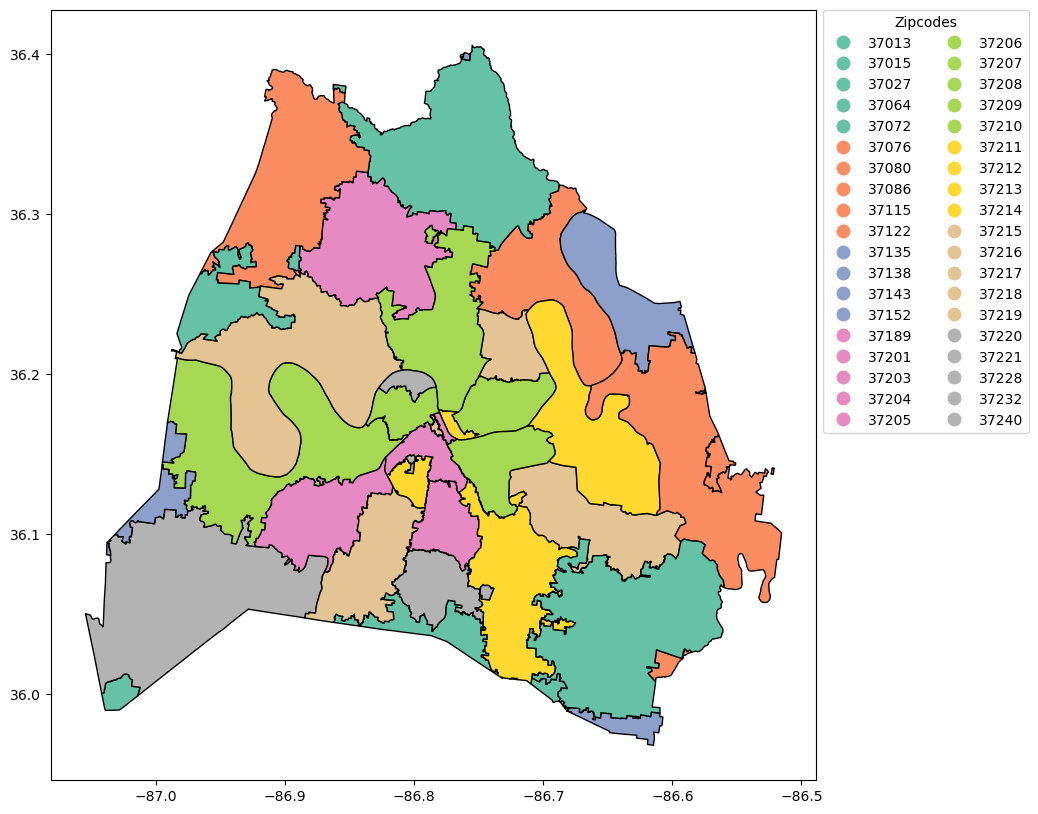

In [35]:
#geopandas will take care of legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.01), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

Downloaded from https://data.nashville.gov/datasets/Nashville::residential-short-term-rental-permits/about

read in csv but ran into error:
"C:\Users\hanna\AppData\Local\Temp\ipykernel_2864\541554551.py:1: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  nash_short_term_rentals = pd.read_csv('../data/residential_short_term_rental_permits.csv')"

Inspected cloumns 17 and 20 to see what the issue was by reading in csv with low_memory=False. 
Then used "print(nash_short_term_rentals.columns[17])" and "print(nash_short_term_rentals.columns[20])" to get the cloumn names: 
17. Permit Owner Address 3 
20. Permit Owner Zip Code

Used this "nash_short_term_rentals["Permit Owner Zip Code"].apply(type).value_counts()":
Permit Owner Zip Code
<class 'str'>      16438
<class 'float'>       62
Name: count, dtype: int64
And this nash_short_term_rentals["Permit Owner Address 3"].apply(type).value_counts():
Permit Owner Address 3
<class 'float'>    16370
<class 'str'>        130
Name: count, dtype: int64

to determine the data types for each. Permit Owner address appears to be mostly NaN values.

head and tail of both colummns:
print(nash_short_term_rentals[[nash_short_term_rentals.columns[17], nash_short_term_rentals.columns[20]]].head(20))
print(nash_short_term_rentals[[nash_short_term_rentals.columns[17], nash_short_term_rentals.columns[20]]].tail(20))

changed data type to str: "Permit Owner Address 3": str, "Permit Owner Zip Code": str

In [36]:
nash_short_term_rentals = pd.read_csv('../data/residential_short_term_rental_permits.csv',dtype={
        "Permit Owner Address 3": str,
        "Permit Owner Zip Code": str
    },
    low_memory=False
)
print(nash_short_term_rentals.shape)
nash_short_term_rentals.head(3)

(16500, 39)


,Permit #,Permit Subtype Description,Date Entered,Date Issued,Address,City,State,Subdivision Lot,Permit Type,Permit SubType,...,Contact Mobile Phone #,Contact Work Phone #,Contact Work Phone Ext,Longitude,Latitude,ObjectId,Zip Code,Parcel,x,y
0,2016037036,Short Term Rental - Non-Owner Occupied,7/21/2016 5:00:00 AM,8/2/2016 5:00:00 AM,2009 FRANKLIN AVE,NASHVILLE,TN,PT LOT B 1ST SUB BROWNSVILLE,CASR,CAZ10A002,...,NaN,NaN,NaN,-86.733497,36.183848,1,37206,08306020100,-9.655129e+06,4.325948e+06
1,2016037102,Short Term Rental – Multifamily,7/22/2016 5:00:00 AM,11/7/2016 6:00:00 AM,908 1ST AVE N,NASHVILLE,TN,UNIT 908 RIVERFRONT CONDO 2ND AMEND,CASR,CAZ10A003,...,NaN,NaN,NaN,-86.780911,36.174009,2,37201,082140A04200CO,-9.660407e+06,4.324591e+06
2,2016037109,Short Term Rental – Multifamily,7/22/2016 5:00:00 AM,8/16/2016 5:00:00 AM,1304 B MONTGOMERY AVE,NASHVILLE,TN,UNIT 13 THE FLATS AT HIGHLAND HEIGHTS AMENDED,CASR,CAZ10A003,...,NaN,NaN,NaN,-86.756125,36.194246,3,37207,071160A01300CO,-9.657648e+06,4.327382e+06


Dropped unwanted columns w/ NaN values

In [37]:
#dropped NaN value columns
nash_short_term_rentals_clean = nash_short_term_rentals.drop(columns=['Permit Owner Address 3', 
                                                                      'Contact Mobile Phone #',
                                                                      'Contact Work Phone #', 
                                                                      'Contact Work Phone Ext',
                                                                     'Applicant Work Phone Ext',
                                                                     'Contact Home Phone #',
                                                                     'Applicant Mobile Phone #',
                                                                    'Applicant Work Phone #',
                                                                     'Applicant Home Phone #'])

print(nash_short_term_rentals_clean.head(20))

      Permit #              Permit Subtype Description          Date Entered  \
0   2016037036  Short Term Rental - Non-Owner Occupied  7/21/2016 5:00:00 AM   
1   2016037102         Short Term Rental – Multifamily  7/22/2016 5:00:00 AM   
2   2016037109         Short Term Rental – Multifamily  7/22/2016 5:00:00 AM   
3   2016037162      Short Term Rental - Owner Occupied  7/22/2016 5:00:00 AM   
4   2016037223  Short Term Rental - Non-Owner Occupied  7/22/2016 5:00:00 AM   
5   2016037371      Short Term Rental - Owner Occupied  7/25/2016 5:00:00 AM   
6   2016037372  Short Term Rental - Non-Owner Occupied  7/25/2016 5:00:00 AM   
7   2016037411      Short Term Rental - Owner Occupied  7/25/2016 5:00:00 AM   
8   2016037420  Short Term Rental - Non-Owner Occupied  7/25/2016 5:00:00 AM   
9   2016037427  Short Term Rental - Non-Owner Occupied  7/25/2016 5:00:00 AM   
10  2016037436  Short Term Rental - Non-Owner Occupied  7/25/2016 5:00:00 AM   
11  2016037480  Short Term Rental - Non-

Filtered for only short term rentals with the permit status as 'ISSUED'

In [38]:
unique_permit_status = nash_short_term_rentals_clean['Permit Status'].value_counts()

print(unique_permit_status)

Permit Status
ISSUED       7540
EXPIRED      6939
CANCELLED    1836
REVOKED        87
EXPIREEXT      46
PENDING        26
HOLD           19
REFUNDED        3
DENIED          2
DENIED-D        1
VOID            1
Name: count, dtype: int64


Permit Status:
ISSUED       7540
EXPIRED      6939
CANCELLED    1836
REVOKED        87
EXPIREEXT      46
PENDING        26
HOLD           19
REFUNDED        3
DENIED          2
DENIED-D        1
VOID            1

In [39]:
issued_permits = nash_short_term_rentals_clean[nash_short_term_rentals_clean['Permit Status'] == 'ISSUED']
print(issued_permits.head())

     Permit #              Permit Subtype Description          Date Entered  \
2  2016037109         Short Term Rental – Multifamily  7/22/2016 5:00:00 AM   
3  2016037162      Short Term Rental - Owner Occupied  7/22/2016 5:00:00 AM   
4  2016037223  Short Term Rental - Non-Owner Occupied  7/22/2016 5:00:00 AM   
5  2016037371      Short Term Rental - Owner Occupied  7/25/2016 5:00:00 AM   
6  2016037372  Short Term Rental - Non-Owner Occupied  7/25/2016 5:00:00 AM   

            Date Issued                Address       City State  \
2  8/16/2016 5:00:00 AM  1304 B MONTGOMERY AVE  NASHVILLE    TN   
3  10/7/2016 5:00:00 AM      3210 SOUTHLAKE DR  NASHVILLE    TN   
4   8/2/2016 5:00:00 AM    1012 BATTLEFIELD DR  NASHVILLE    TN   
5   8/9/2016 5:00:00 AM         809 SHELBY AVE  NASHVILLE    TN   
6   8/8/2016 5:00:00 AM      5203 KENTUCKY AVE  NASHVILLE    TN   

                                 Subdivision Lot Permit Type Permit SubType  \
2  UNIT 13 THE FLATS AT HIGHLAND HEIGHTS AM

Rename column 'Zip Code','Longitude', and 'Latitude' to match the Zipcodes dataframe and to format for geopandas.

In [40]:
issued_permits_zip = issued_permits.rename(columns={'Zip Code' : 'Zip', 
                                                    'Longitude': 'lng', 
                                                    'Latitude' : 'lat'})

print(issued_permits_zip.head(3))

     Permit #              Permit Subtype Description          Date Entered  \
2  2016037109         Short Term Rental – Multifamily  7/22/2016 5:00:00 AM   
3  2016037162      Short Term Rental - Owner Occupied  7/22/2016 5:00:00 AM   
4  2016037223  Short Term Rental - Non-Owner Occupied  7/22/2016 5:00:00 AM   

            Date Issued                Address       City State  \
2  8/16/2016 5:00:00 AM  1304 B MONTGOMERY AVE  NASHVILLE    TN   
3  10/7/2016 5:00:00 AM      3210 SOUTHLAKE DR  NASHVILLE    TN   
4   8/2/2016 5:00:00 AM    1012 BATTLEFIELD DR  NASHVILLE    TN   

                                 Subdivision Lot Permit Type Permit SubType  \
2  UNIT 13 THE FLATS AT HIGHLAND HEIGHTS AMENDED        CASR      CAZ10A003   
3                         LOT 73 SEC 1 SOUTHLAKE        CASR      CAZ10A001   
4        N SIDE BATTLEFIELD DR W OF LEALAND LANE        CASR      CAZ10A002   

   ... Permit Status                     Applicant  \
2  ...        ISSUED                     D2

In [41]:
print(issued_permits_zip.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7540 entries, 2 to 15998
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Permit #                    7540 non-null   object 
 1   Permit Subtype Description  7540 non-null   object 
 2   Date Entered                7540 non-null   object 
 3   Date Issued                 7540 non-null   object 
 4   Address                     7540 non-null   object 
 5   City                        7540 non-null   object 
 6   State                       7540 non-null   object 
 7   Subdivision Lot             7540 non-null   object 
 8   Permit Type                 7540 non-null   object 
 9   Permit SubType              7540 non-null   object 
 10  Purpose                     7536 non-null   object 
 11  Council District            7540 non-null   int64  
 12  Census Tract                7540 non-null   int64  
 13  Expiration Date             7540 non-

Dropped the permit owner info columns because I only want a map of short term rentals.

In [42]:
permit_owner_info = issued_permits_zip.columns[14:20]
issued_permits_zip_clean = issued_permits_zip.drop(columns=permit_owner_info)
print(issued_permits_zip_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7540 entries, 2 to 15998
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Permit #                    7540 non-null   object 
 1   Permit Subtype Description  7540 non-null   object 
 2   Date Entered                7540 non-null   object 
 3   Date Issued                 7540 non-null   object 
 4   Address                     7540 non-null   object 
 5   City                        7540 non-null   object 
 6   State                       7540 non-null   object 
 7   Subdivision Lot             7540 non-null   object 
 8   Permit Type                 7540 non-null   object 
 9   Permit SubType              7540 non-null   object 
 10  Purpose                     7536 non-null   object 
 11  Council District            7540 non-null   int64  
 12  Census Tract                7540 non-null   int64  
 13  Expiration Date             7540 non-

- you want the CRS for the bus stops to match the CRS in the zipcodes GeoDataFrame 


In [43]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### The `GeoDataFrame()` constructor needs 3 parameters:
 - a DataFrame
 - a coordinate reference system
 - a geometry (we will use the geopandas `points_from_xy()` method to create a Point geometry)

In [44]:
issued_permits_zip_clean_geo = gpd.GeoDataFrame(issued_permits_zip_clean, 
                           crs = zipcodes.crs, 
                           geometry = gpd.points_from_xy(issued_permits_zip_clean.lng, issued_permits_zip_clean.lat))

In [45]:
type(issued_permits_zip_clean_geo)

geopandas.geodataframe.GeoDataFrame

#### Now you are ready to combine bus stops and zipcodes with a spatial join
- first a little clean up for the zipcodes
    - just keep the zip, po_name, and geometry columns
- then construct the join 
    - keep in mind that you want to find the **bus stops within a zip code polygon**
    - the geometry for the new (combined) GeoDataFrame comes from the left GeoDataFrame


In [46]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [47]:
rentals_by_zip = gpd.sjoin(issued_permits_zip_clean_geo, zipcodes, predicate = 'within')

In [48]:
rentals_by_zip.head()

,Permit #,Permit Subtype Description,Date Entered,Date Issued,Address,City,State,Subdivision Lot,Permit Type,Permit SubType,...,lat,ObjectId,Zip,Parcel,x,y,geometry,index_right,zip,po_name
2,2016037109,Short Term Rental – Multifamily,7/22/2016 5:00:00 AM,8/16/2016 5:00:00 AM,1304 B MONTGOMERY AVE,NASHVILLE,TN,UNIT 13 THE FLATS AT HIGHLAND HEIGHTS AMENDED,CASR,CAZ10A003,...,36.194246,3,37207,071160A01300CO,-9.657648e+06,4.327382e+06,POINT (-86.75612 36.19425),42,37207,NASHVILLE
3,2016037162,Short Term Rental - Owner Occupied,7/22/2016 5:00:00 AM,10/7/2016 5:00:00 AM,3210 SOUTHLAKE DR,NASHVILLE,TN,LOT 73 SEC 1 SOUTHLAKE,CASR,CAZ10A001,...,36.103950,5,37211,13303003300,-9.654627e+06,4.314934e+06,POINT (-86.72899 36.10395),49,37211,NASHVILLE
4,2016037223,Short Term Rental - Non-Owner Occupied,7/22/2016 5:00:00 AM,8/2/2016 5:00:00 AM,1012 BATTLEFIELD DR,NASHVILLE,TN,N SIDE BATTLEFIELD DR W OF LEALAND LANE,CASR,CAZ10A002,...,36.115154,6,37204,11805008500,-9.661245e+06,4.316478e+06,POINT (-86.78844 36.11515),2,37204,NASHVILLE
5,2016037371,Short Term Rental - Owner Occupied,7/25/2016 5:00:00 AM,8/9/2016 5:00:00 AM,809 SHELBY AVE,NASHVILLE,TN,LOT 140 J S WILLIAMS ADDN,CASR,CAZ10A001,...,36.170445,7,37206,08216038000,-9.657585e+06,4.324100e+06,POINT (-86.75556 36.17044),13,37206,NASHVILLE
6,2016037372,Short Term Rental - Non-Owner Occupied,7/25/2016 5:00:00 AM,8/8/2016 5:00:00 AM,5203 KENTUCKY AVE,NASHVILLE,TN,LOT 1106 PT LOT 1104 BLK 170 WEST NASH 1,CASR,CAZ10A002,...,36.159593,8,37209,09107022100,-9.668167e+06,4.322603e+06,POINT (-86.85062 36.15959),12,37209,NASHVILLE


In [49]:
rentals_by_zip.tail()

,Permit #,Permit Subtype Description,Date Entered,Date Issued,Address,City,State,Subdivision Lot,Permit Type,Permit SubType,...,lat,ObjectId,Zip,Parcel,x,y,geometry,index_right,zip,po_name
15994,2024071823,Short Term Rental - Owner Occupied,8/8/2024 5:00:00 AM,8/8/2024 5:00:00 AM,623 N 9TH ST,NASHVILLE,TN,LOT 162 BEAZLEY SUB MCFERRIN BLOCK 1,CASR,CAZ10A001,...,36.182093,15996,37206,08208015700,-9.657904e+06,4.325706e+06,POINT (-86.75843 36.18209),13,37206,NASHVILLE
15995,2024071945,Short Term Rental - Owner Occupied,8/8/2024 5:00:00 AM,8/31/2024 5:00:00 AM,135 B DEL CREST DR,NASHVILLE,TN,LOT 137 PRIEST LAKE PARK SEC 3,CASR,CAZ10A001,...,36.094562,15997,37217,13607008700,-9.641034e+06,4.313641e+06,POINT (-86.60688 36.09456),17,37217,NASHVILLE
15996,2024072037,Short Term Rental - Owner Occupied,8/8/2024 5:00:00 AM,8/9/2024 5:00:00 AM,2308 ST LOUIS ST,NASHVILLE,TN,LOT 20 PT 16 NICHOL,CASR,CAZ10A001,...,36.181462,15998,37208,08106042500,-9.664242e+06,4.325619e+06,POINT (-86.81536 36.18146),40,37208,NASHVILLE
15997,2024072068,Short Term Rental – Multifamily,8/8/2024 5:00:00 AM,10/21/2024 5:00:00 AM,3303 GALLATIN PIKE 204,NASHVILLE,TN,UNIT 204 INGLEWOOD LOFTS CONDOMINIUMS,CASR,CAZ10A003,...,36.209581,15999,37216,072020A00500CO,-9.655243e+06,4.329498e+06,POINT (-86.73452 36.20958),1,37216,NASHVILLE
15998,2024072559,Short Term Rental – Multifamily,8/9/2024 5:00:00 AM,8/13/2024 5:00:00 AM,210 3RD AVE N 300,NASHVILLE,TN,PT LOT 26 ORIGINAL TOWN OF NASHVILLE,CASR,CAZ10A003,...,36.164740,16000,37201,09302317200,-9.660053e+06,4.323313e+06,POINT (-86.77773 36.16474),36,37201,NASHVILLE


#### Now that the data is joined spatially you can count the short term rentals by zip code  and see how many short term rentals are within each polygon 
- using the `value_counts()` method


In [50]:
rentals_by_zip['zip'].value_counts()

zip
37203    1844
37208     747
37206     710
37207     704
37212     614
37209     494
37210     444
37201     370
37216     326
37211     198
37204     188
37214     187
37217     129
37218     118
37115     107
37219      75
37205      46
37076      44
37138      35
37013      30
37215      26
37189      21
37221      21
37072      17
37228      17
37220      12
37080       9
37143       3
37027       2
37213       1
37064       1
Name: count, dtype: int64

#### Let's take a closer look at the 704 short term rentals in the 37207 zip code
- filter the rentals_by_zip data to just get short term rentals in 37207
- filter the zip code geodataframe to just the polygon (row) for 37207


In [51]:
rentals_in_37207 = rentals_by_zip.loc[rentals_by_zip['zip'] == '37207']
rentals_in_37207.shape

(704, 28)

In [52]:
polygon37207 = zipcodes.loc[zipcodes['zip'] == '37207']
polygon37207.shape

(2, 3)

#### Now plot these two together
- first plot the polygons for 37207 and make them light green
- next plot the points for the short term rentals

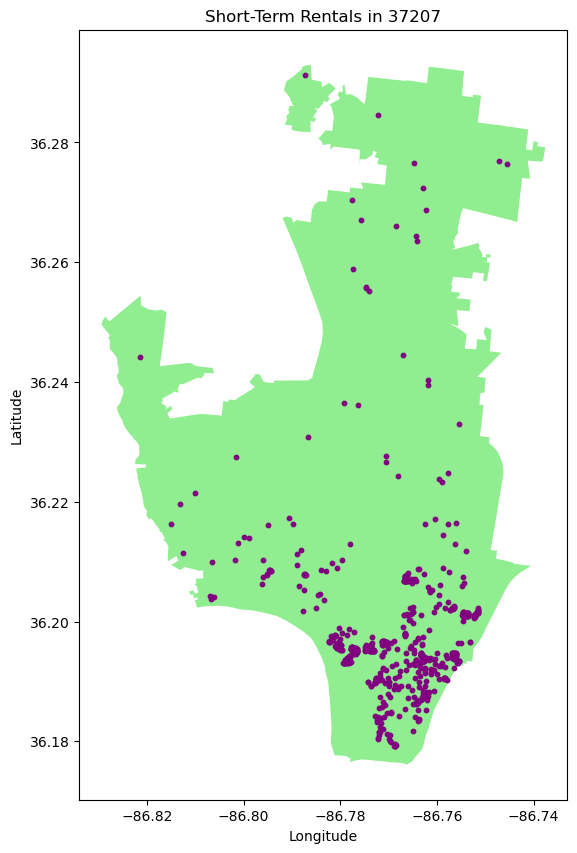

In [53]:
#fig, ax = matplotlib.subplots()
ax = polygon37207.plot(figsize = (8, 10), color = 'lightgreen')
rentals_in_37207.plot(ax=ax, color='purple', markersize=10)
plt.title("Short-Term Rentals in 37207")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

#### We're getting there! It would be helpful to have streets, though wouldn't it? We can add a street map with the folium package.

#### folium maps require a center point for the street map. 
- Make use of a GeoSeries attribute (.centroid) which gives the center of a polygon
- Since there are two polygons which should we use?

In [54]:
polygon37207.geometry.centroid

C:\Users\hanna\AppData\Local\Temp\ipykernel_10708\3792774199.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37207.geometry.centroid


19    POINT (-86.78726 36.28724)
42    POINT (-86.77677 36.23245)
dtype: geometry

In [55]:
#find the center of the larger (more southern) polygon and look at it
center = polygon37207.geometry.centroid[42]
print(center)

POINT (-86.77676762469858 36.23245257407244)


C:\Users\hanna\AppData\Local\Temp\ipykernel_10708\3995710814.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37207.geometry.centroid[42]


#### Folium requires a location point as an array 
- with *latitude* first
- but shapely Points have *longitude* first 

In [56]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.23245257407244, -86.77676762469858]


#### To create a folium map just call the folium `Map()` constructor
- `location` is the only argument required by the constructor
    - Set `area_center` as the `location` of the folium map. 
- `zoom_start` is an optional argument 
    - A setting of 12 should get us nice and close

In [57]:
#create our map of Nashville Zip Code 37207 and show it
map_37207 = folium.Map(location =  area_center, zoom_start = 12)
map_37207

#### Next, let's add our 37207 polygon and bus stop markers.

#### `itterows()` is a generator that iterates through the rows of a DataFrame and returns a tuple with the row id and row values. 
- Below, we are printing the row values for the first 3 row as we iterate through the GeoDataFrame of bus stops in 37207. 
- This idea will be helpful for creating our markers!

In [58]:
i = 0
for row_index, row_values in rentals_in_37207.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 2
values are:
 
Permit #                                                             2016037109
Permit Subtype Description                      Short Term Rental – Multifamily
Date Entered                                               7/22/2016 5:00:00 AM
Date Issued                                                8/16/2016 5:00:00 AM
Address                                                   1304 B MONTGOMERY AVE
City                                                                  NASHVILLE
State                                                                        TN
Subdivision Lot                   UNIT 13 THE FLATS AT HIGHLAND HEIGHTS AMENDED
Permit Type                                                                CASR
Permit SubType                                                        CAZ10A003
Purpose                       By making this application for a Residential S...
Council District                                                              5
Census Tract   

#### Create map_37207 again with additional features:
- add the zipcode area outline (polygon_37207)
- iterate through the stops_in_37207 to
    - create location from each lat and lng
    - create a popup from the stop column
    - create a custom icon if you want with [font-awesome](https://fontawesome.com/v4.7.0/icons/)
    - build a marker from each location and popup and (optionally) your custom icon 
    - add the marker to  `map_37207`
- display `map_37207`

In [65]:
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)

#iterate through rentals_in_37207 to create locations and markers 
#for each short term rental
#remember for Folium locations, lat is listed first!!

for row_index, row_values in rentals_in_37207.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = f"Permit #: {row_values['Permit #']}<br>Type: {row_values['Permit Subtype Description']}"
    icon=folium.Icon(color="blue",icon="bed", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37207)
map_37207.save('../maps/map37207.html')

#display our map
map_37207

#### If you have a lot of markers, you might want to use marker clusters
- Folium has `MarkerCluster()` and `FastMarkerCluster()`
- Construct a `MarkerCluster()` 
    - construct a `MarkerCluster()` and `.add_to()` the map
    - when you loop through the data and create markers add those to the marker cluster
- Construct a `FastMarkerCluster()` by passing a list of locations

#### You can save your map as an html file and it will retain the interactive qualities

In [26]:
folium.Map?

Init signature:
folium.Map(
    location=None,
    width='100%',
    height='100%',
    left='0%',
    top='0%',
    position='relative',
    tiles='OpenStreetMap',
    attr=None,
    min_zoom=0,
    max_zoom=18,
    zoom_start=10,
    min_lat=-90,
    max_lat=90,
    min_lon=-180,
    max_lon=180,
    max_bounds=False,
    crs='EPSG3857',
    control_scale=False,
    prefer_canvas=False,
    no_touch=False,
    disable_3d=False,
    png_enabled=False,
    zoom_control=True,
    **kwargs,
)
Docstring:     
Create a Map with Folium and Leaflet.js

Generate a base map of given width and height with either default
tilesets or a custom tileset URL. The following tilesets are built-in
to Folium. Pass any of the following to the "tiles" keyword:

    - "OpenStreetMap"
    - "Mapbox Bright" (Limited levels of zoom for free tiles)
    - "Mapbox Control Room" (Limited levels of zoom for free tiles)
    - "Stamen" (Terrain, Toner, and Watercolor)
    - "Cloudmade" (Must pass API key)
    - "Mapb

In [40]:
cluster_map_37207 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37207)

folium.GeoJson(polygon37207).add_to(cluster_map_37207)

# inside the loop add each marker to the cluster
for row_index, row_values in stops_in_37207.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37207.save('../maps/cluster37207.html')

cluster_map_37207  

In [41]:
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)

#create a list of locations and pass them to FastMarkerCluster()
locations = stops_in_37207[['lat', 'lng']].values.tolist()
map_37207.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_37207